In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.io as sp
import matplotlib.transforms as transforms

# Load Data and Model Fits

In [2]:
QSS_Stds = sp.loadmat("IndDat_int1_qq_Stds.mat")['Stds_all'][0: 1162,:]
QSS_Stds.shape

(1162, 78)

In [3]:
CSS_Stds = sp.loadmat("IndDat_classical_Stds.mat")['Stds_all'][0: 1162,:]
CSS_Stds.shape

(1162, 78)

# Four Sigma Participants

In [4]:
four_sig_p = sp.loadmat("4sig_participant.mat")['participant_list'][0: 1162,:]
four_sig_p = four_sig_p.flatten()
four_sig_p = np.subtract(four_sig_p,1) #matlab is one indexing

In [5]:
CSS_std_four_sig = []
QSS_std_four_sig = []

In [6]:
for p in four_sig_p:
    CSS_std_four_sig.append(np.power(CSS_Stds[p],1))
    QSS_std_four_sig.append(np.power(QSS_Stds[p],1))

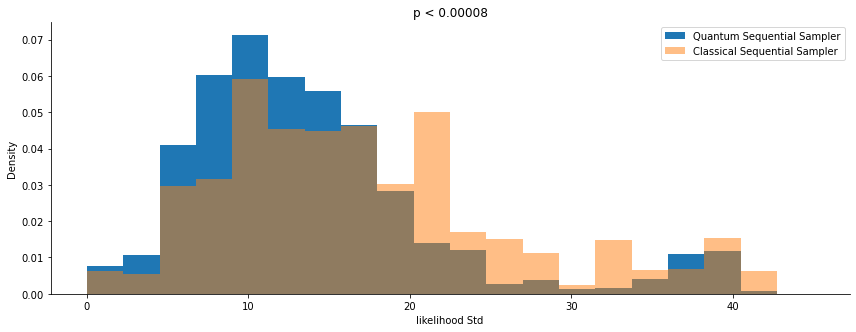

In [7]:
plt.rcParams["figure.figsize"] = (12,4.5)
bins = np.linspace(0, 45, 21)
plt.hist(np.array(QSS_std_four_sig).flatten(), bins, alpha = 1, histtype = "barstacked",
         density = "True", label = "Quantum Sequential Sampler")
plt.hist(np.array(CSS_std_four_sig).flatten(), bins, alpha = 0.5, histtype = "barstacked",
         density = "True", label = "Classical Sequential Sampler")
plt.legend()
plt.ylabel("Density", fontsize = 10)
plt.xlabel("likelihood Std", fontsize = 10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.title("p < 0.00008", fontsize = 12)
plt.savefig("four_sigma_std_cqss.jpg", dpi = 500, bbox_inches='tight')

# Two Sigma Participants

In [8]:
two_sig_p = sp.loadmat("2sig_participant.mat")['participant_list'][0: 1162,:]
two_sig_p = two_sig_p.flatten()
two_sig_p = np.subtract(two_sig_p,1) #matlab is one indexing

In [9]:
CSS_std_two_sig = []
QSS_std_two_sig = []

In [10]:
for p in two_sig_p:
    CSS_std_two_sig.append(np.power(CSS_Stds[p],1))
    QSS_std_two_sig.append(np.power(QSS_Stds[p],1))

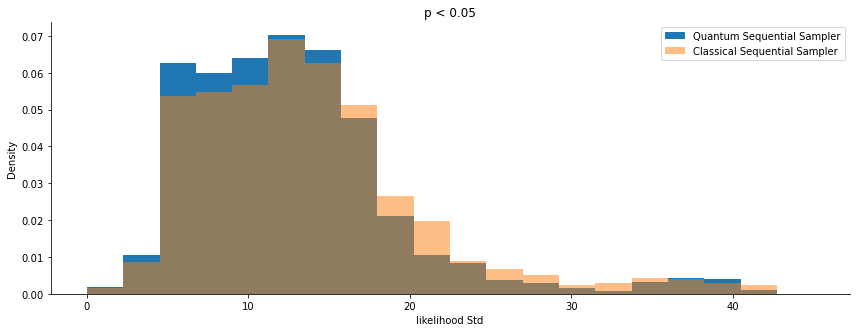

In [11]:
plt.rcParams["figure.figsize"] = (12,4.5)
bins = np.linspace(0, 45, 21)
plt.hist(np.array(QSS_std_two_sig).flatten(), bins, alpha = 1, histtype = "barstacked",
         density = "True", label = "Quantum Sequential Sampler")
plt.hist(np.array(CSS_std_two_sig).flatten(), bins, alpha = 0.5, histtype = "barstacked",
         density = "True", label = "Classical Sequential Sampler")
plt.legend()
plt.ylabel("Density", fontsize = 10)
plt.xlabel("likelihood Std", fontsize = 10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.title("p < 0.05", fontsize = 12)
plt.savefig("two_sigma_std_cqss.jpg", dpi = 500, bbox_inches='tight')